In [1]:
import sys
import os
from pathlib import Path

project_root = str(Path(os.getcwd()).parent)

if project_root not in sys.path:
    sys.path.insert(0, project_root)

from src.augmentation import augment_training_set
from src.data_loader import unpack_and_resize_data

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from datasets import load_dataset

from tensorflow.keras.utils import to_categorical
from collections import Counter

c:\Users\radit\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load dataset
dataset = load_dataset("garythung/trashnet")
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 5054
    })
})

## **Dataset Identification**

Total images: 5054


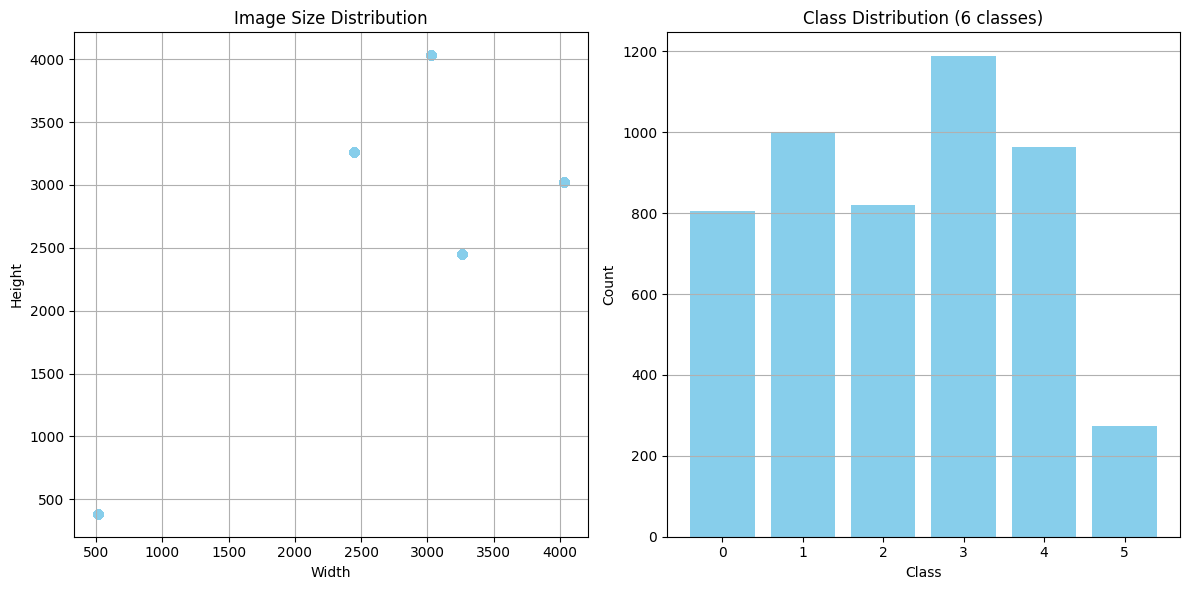

In [3]:
print(f"Total images: {len(dataset['train'])}")

image_sizes = []
labels = []

for item in dataset['train']:
    width, height = item['image'].size 
    image_sizes.append((width, height))
    labels.append(item['label'])

# Unique labels
class_distribution = Counter(labels)
num_classes = len(class_distribution)

# Plot image size distribution
widths, heights = zip(*image_sizes)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(widths, heights, alpha=0.5, color='skyblue')
plt.title("Image Size Distribution")
plt.xlabel("Width")
plt.ylabel("Height")
plt.grid(True)

# Plot class distribution
plt.subplot(1, 2, 2)
plt.bar([str(cls) for cls in class_distribution.keys()], class_distribution.values(), color='skyblue')
plt.title(f"Class Distribution ({num_classes} classes)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.grid(axis='y')

plt.tight_layout()
plt.show()

From the plot we can learn that the dataset have various image size and needs to be resized to the same size later on. The distribution of the classes shows that it's an imbalance dataset, class 5 have little amount of data.

## **Unpack and Resize data**

We need to make sure images has the same shape so we need to resize the image

In [3]:
# Preprocess the data
features, labels = unpack_and_resize_data(dataset['train'], target_size=(224, 224))

# Convert labels to categorical
num_classes = len(np.unique(labels))
labels = to_categorical(labels, num_classes)

## **Augment Data**

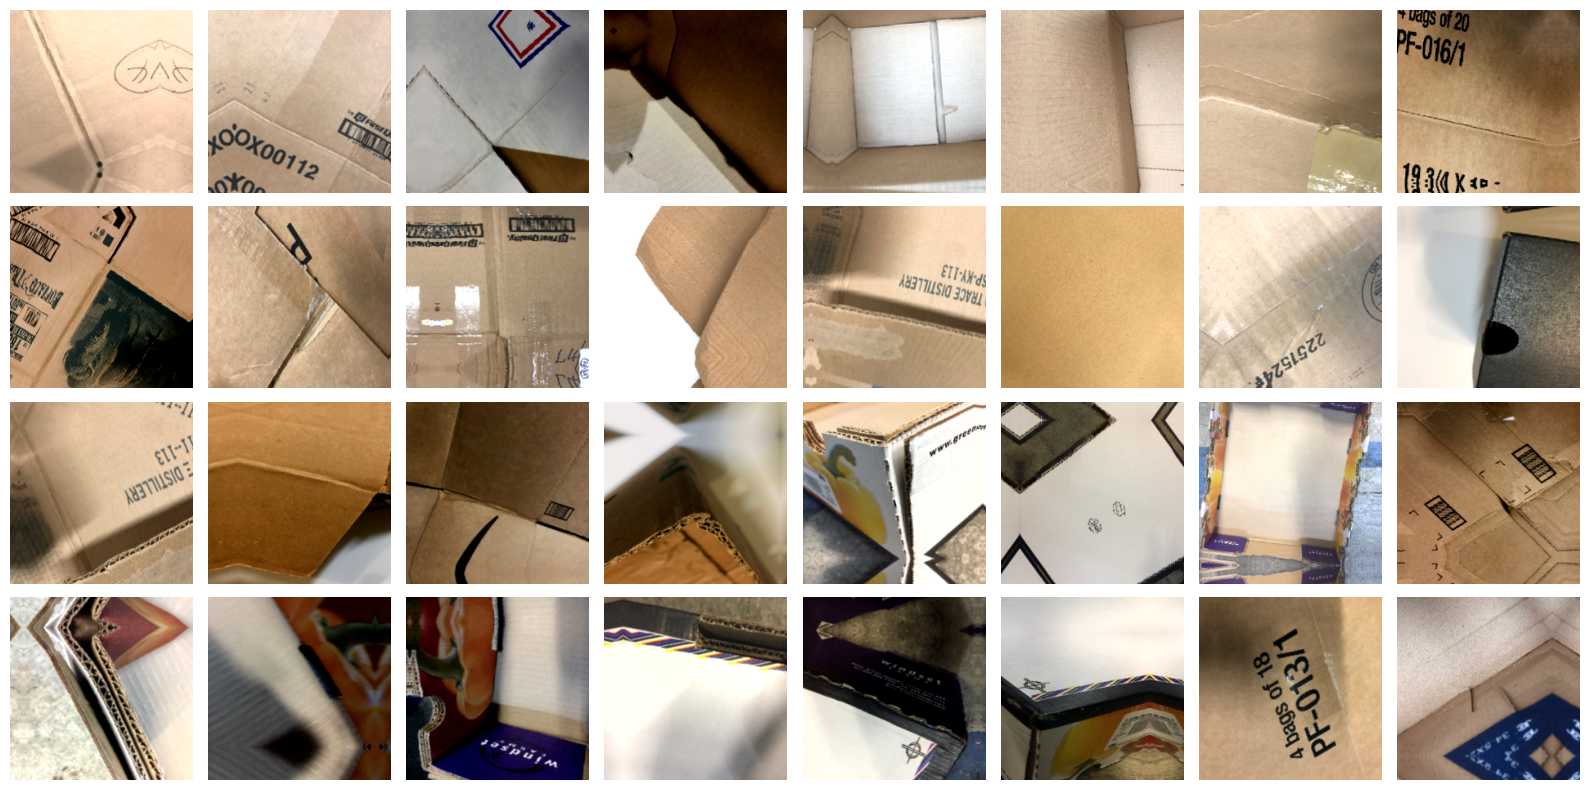

In [4]:
feature_sample = augment_training_set(features[:32]) 
label_sample = labels[:32]

fig, axes = plt.subplots(nrows=4, ncols=8, figsize=(16, 8))
for i in range(32):
    ax = axes[i // 8, i % 8]
    ax.imshow(feature_sample[i])
    ax.axis('off')

plt.tight_layout()
plt.show()